<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab2_Atividade2_Dados_Exploratorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 2 - Atividade 2**




# **Explorando Dados**

A exploração de dados refere-se à investigação preliminar dos dados para entender melhor suas características específicas.

Há duas motivações principais para a exploração de dados:

*   Auxiliar na seleção de etapas de pré-processamento com as técnicas de análise de dados
*   Auxiliar a renconhecer padrões nos dados

# **Exemplo: Dataset Iris**

# **Análise dos dados**

As métricas estatísticas capturam várias características de um conjunto potencialmente grande de valores com um único número ou um pequeno conjunto de números. Nesta aula usaremos os dados do dataset Iris.

In [ ]:
# montar o drive do google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O código usa o Pandas para ler o arquivo CSV e armazená-lo em um objeto DataFrame denominado em nosso exemplo "data".

In [ ]:
# fazer download do arquivo no link: https://github.com/pandas-dev/pandas/blob/main/pandas/tests/io/data/csv/iris.csv
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Dados_Exploratorios_dataset-cvs/datasets/iris.csv")

Então, exibe as primeiras cinco linhas do quadro de dados.

In [ ]:
dataset.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset.head()

Para cada atributo quantitativo, calcule sua média, desvio padrão, valores mínimo e máximo.

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in dataset.columns:
    if is_numeric_dtype(dataset[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % dataset[col].mean())
        print('\t Standard deviation = %.2f' % dataset[col].std())
        print('\t Minimum = %.2f' % dataset[col].min())
        print('\t Maximum = %.2f' % dataset[col].max())

Para o atributo qualitativo (classe), conte a frequência de cada um de seus valores distintos.

In [ ]:
dataset['class'].value_counts()

Também é possível exibir o resumo de todos os atributos simultaneamente em uma tabela usando a função describe(). Se um atributo for quantitativo, ele exibirá sua média, desvio padrão e vários valores de quantis (incluindo mínimo, mediano e máximo). Se um atributo for qualitativo, ele exibirá seu número de valores exclusivos e os valores principais (mais frequentes).

In [ ]:
dataset.describe(include='all')

Verificar se os dados contêm valores ausentes ou não. Os valores ausentes podem ocorrer quando nenhuma informação é fornecida para um ou mais itens ou para uma unidade inteira. Usamos o método isnull().

In [ ]:
dataset.isnull().sum()

Vamos ver se o conjunto de dados contém duplicatas ou não. O método drop_duplicates() do Pandas ajuda a remover duplicatas do quadro de dados.

In [ ]:
data = dataset.drop_duplicates(subset ='class',)
data

Para estatísticas multivariadas, você pode calcular a covariância e a correlação entre pares de atributos.

In [ ]:
print('Covariance:')
dataset.cov(numeric_only=True)

In [ ]:
print('Correlation:')
dataset.corr(numeric_only=True)

# **Visualização dos dados**

Visualização da coluna de destino
Nossa coluna de destino será a coluna Species (Espécies) porque, no final, precisaremos do resultado de acordo apenas com as espécies. Vamos ver um gráfico de contagem de espécies.

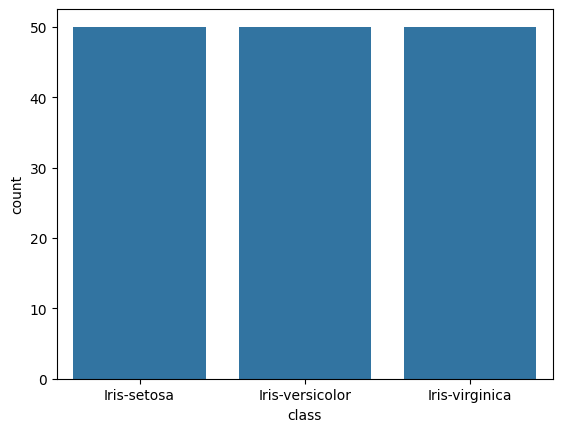

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=dataset, )
plt.show()

Analisar a relação entre o comprimento da sépala e a largura da sépala e entre o comprimento da pétala e a largura da pétala.

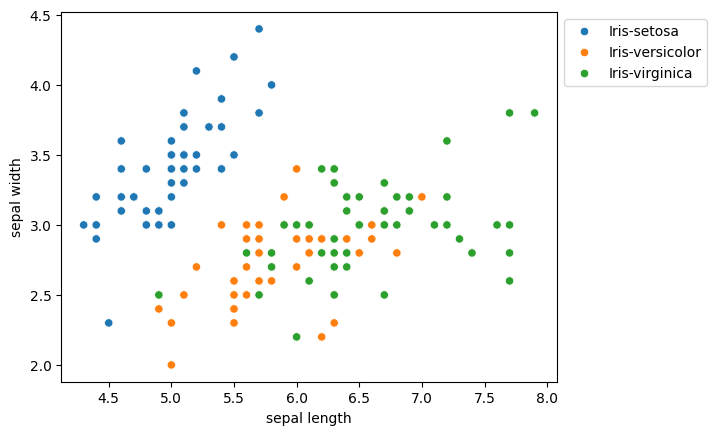

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='sepal length', y='sepal width',
                hue='class', data=dataset, )

# coloca a legenda fora da figura
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()
# A espécie Setosa tem comprimento de sépala menor, mas largura de sépala maior.
# A espécie Versicolor está no meio das outras duas espécies em termos de comprimento e largura das sépalas
# A espécie Virginica tem comprimento de sépala maior, mas largura de sépala menor.

Comparação entre o comprimento e a largura das pétalas

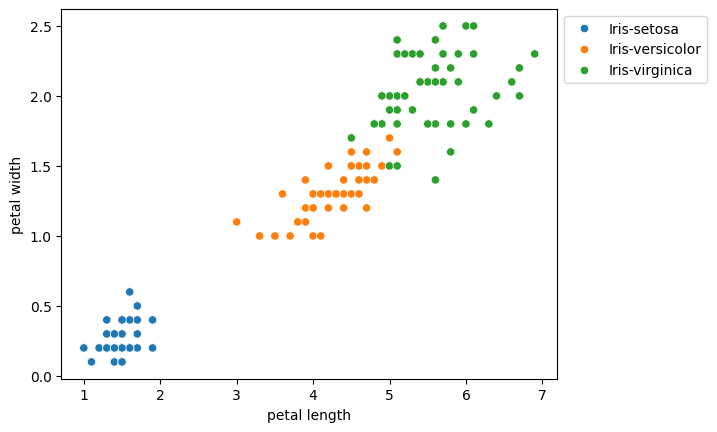

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='petal length', y='petal width',
                hue='class', data=dataset, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

**Scatter plots**

Para cada par de atributos, pode ser usado um gráfico de dispersão para visualizar sua distribuição conjunta.

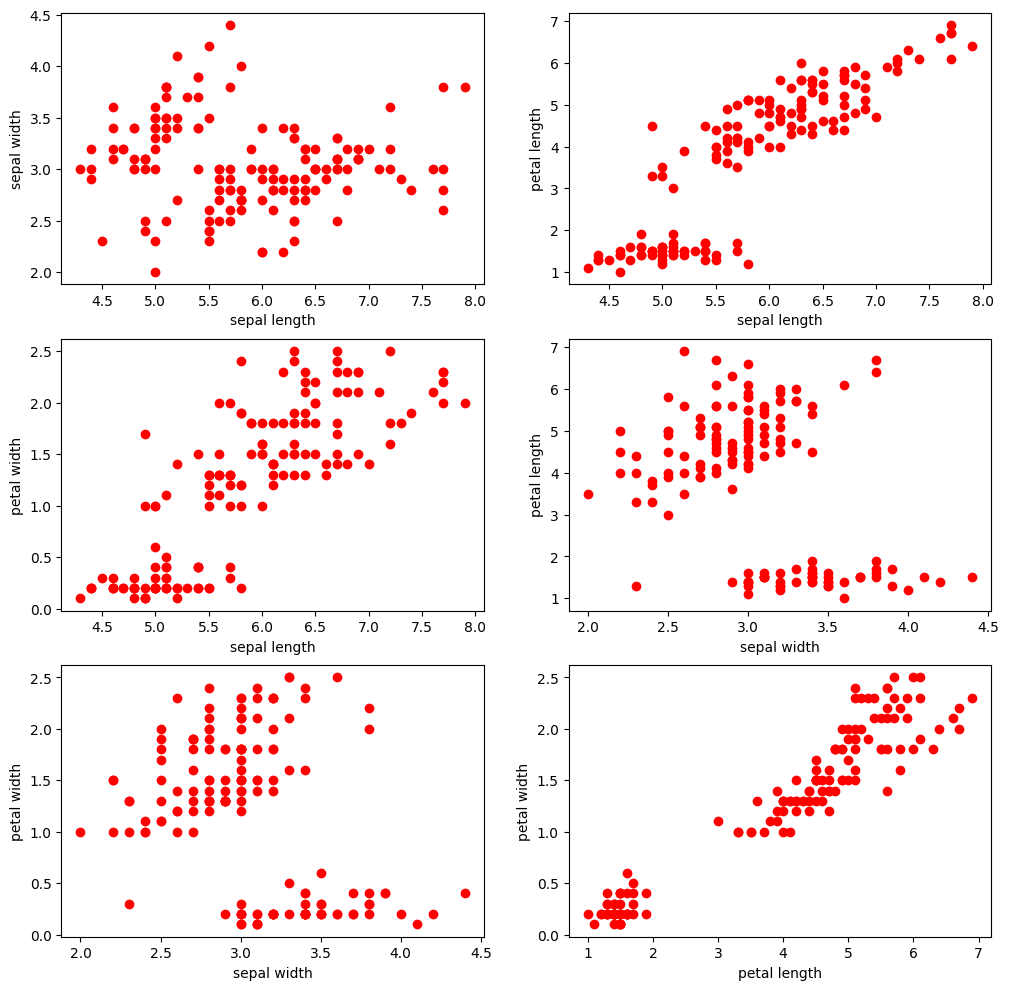

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(dataset[dataset.columns[i]], dataset[dataset.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(dataset.columns[i])
        axes[ax1][ax2].set_ylabel(dataset.columns[j])
        index = index + 1

As coordenadas paralelas podem ser usadas para exibir todos os pontos de dados simultaneamente.

<Axes: >

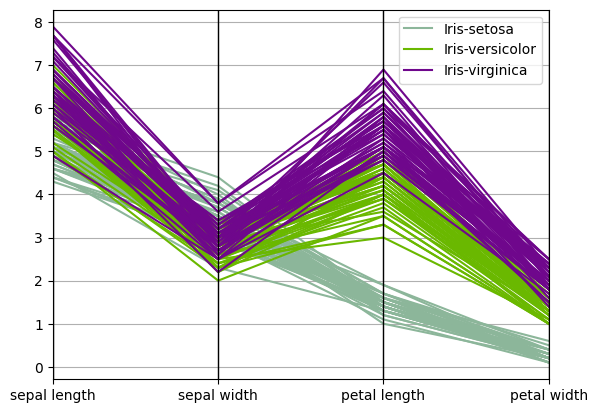

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(dataset, 'class')

Os histogramas permitem ver a distribuição de dados para várias colunas. Ele pode ser usado para análises uni e bivariadas.

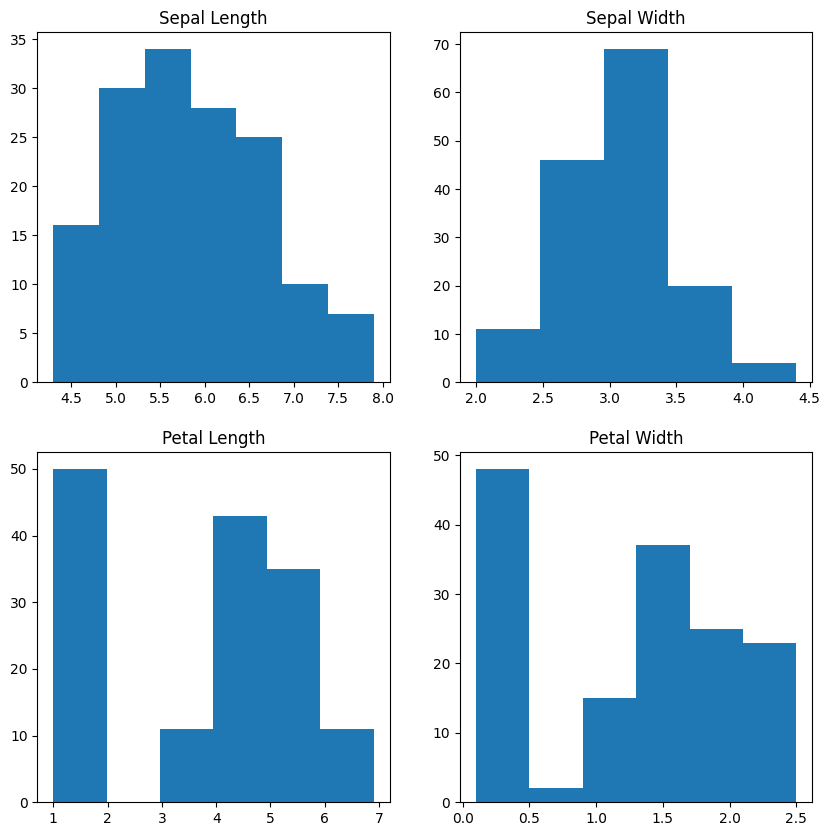

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(dataset['sepal length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(dataset['sepal width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(dataset['petal length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(dataset['petal width'], bins=6);

# **Exercícios**

Use um dos datasets Wine ou Boston para avaliação das análise empregadas em nossa aula. Os datasets podem ser baixados do site da UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets



1) Construa um programa que calcule as medidas estatísticas da base escolhida. Procure usar as funções apresentadas nessa atividade, assim como, outras que estão disponíveis nas bibliotecas do Python.

2) Construa um programa que mostre por meio das representações gráficos as principais características do dataset investigado. Procure usar as funções apresentadas nessa atividade, assim como, outras que estão disponíveis nas bibliotecas do Python.

3) O dataset Iris não possui valores ausentes. A base de escolhida também pode conter todos os descritores por cada amostra. Escolha em seu dataset amostras para imputar valores usando a média, mediana ou outros métodos.